In [ ]:
#importing dataset
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2023-01-22 21:37:55--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 142.250.107.128, 173.194.202.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   132MB/s    in 0.5s    

2023-01-22 21:37:56 (132 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
#Preparing dataset
import os,zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip , 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir , 'train')
validation_dir = os.path.join(base_dir , 'validation')

train_cats_dir = os.path.join(train_dir , 'cats')
train_dogs_dir = os.path.join(train_dir , 'dogs')

validation_cats_dir = os.path.join(validation_dir , 'cats')
validation_dogs_dir = os.path.join(validation_dir , 'dogs')

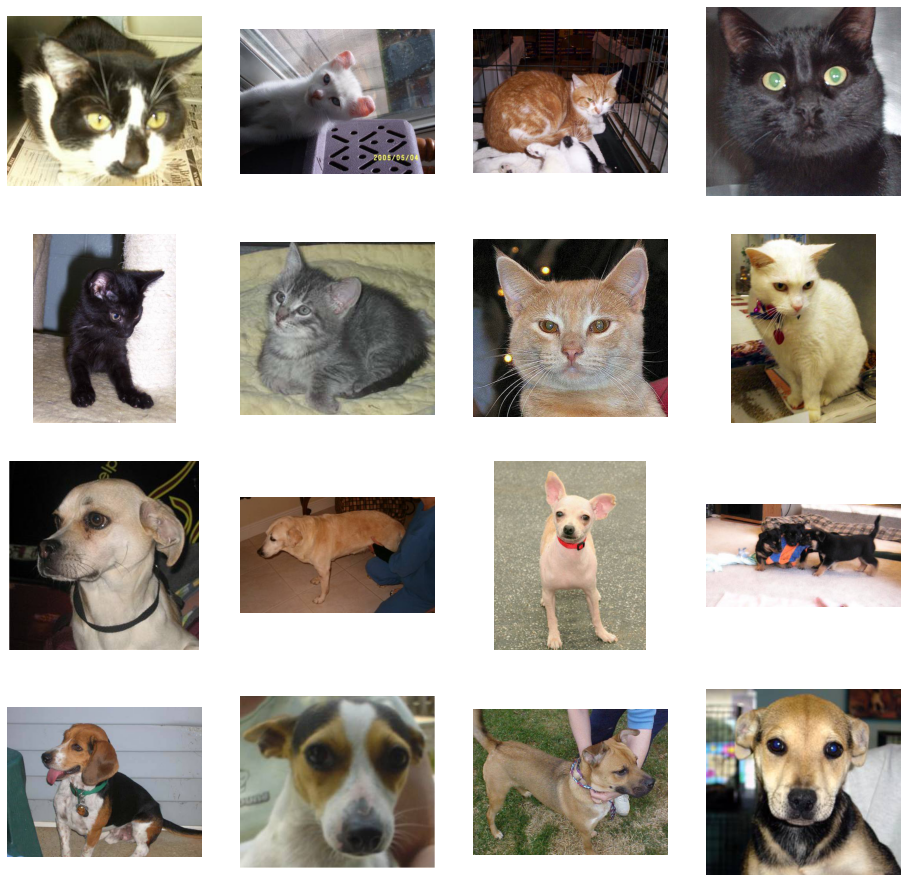

In [ ]:
#this code will check if the images have been loaded correctly or not
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

nrows = 4
ncols = 4

fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)
pic_index = 100
train_cat_fnames = os.listdir( train_cats_dir )
train_dog_fnames = os.listdir( train_dogs_dir )


next_cat_pix = [os.path.join(train_cats_dir, fname) 
                for fname in train_cat_fnames[ pic_index-8:pic_index] 
               ]

next_dog_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dog_fnames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [ ]:
#using resnet50 as classification algorithm

from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255., rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1.0/255.)

train_generator = train_datagen.flow_from_directory(train_dir, batch_size = 20, class_mode = 'binary', target_size = (224, 224))

validation_generator = test_datagen.flow_from_directory( validation_dir, batch_size = 20, class_mode = 'binary', target_size = (224, 224))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
#importing base model 
from tensorflow.keras.applications import ResNet50

base_model = ResNet50(input_shape = (224,224,3) , include_top = False , weights = 'imagenet')

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
for layer in base_model.layers:
  layer.trainable = False

In [ ]:
#buiding and compiling the model 
from tensorflow.keras.applications import ResNet50
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, BatchNormalization

base_model = Sequential()
base_model.add(ResNet50(include_top = False, weights = 'imagenet', pooling = 'max'))
base_model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
from tensorflow.keras.optimizers import SGD

In [ ]:
base_model.compile(optimizer = SGD(learning_rate=0.0001), loss = 'binary_crossentropy', metrics = ['acc'])

In [ ]:
resnet_history = base_model.fit(train_generator, validation_data = validation_generator, steps_per_epoch = 100, epochs = 10)

Epoch 1/10
100/100 [==============================] - 1659s 17s/step - loss: 1.4591 - acc: 0.6720 - val_loss: 0.7840 - val_acc: 0.5310
Epoch 2/10
100/100 [==============================] - 1644s 16s/step - loss: 0.6118 - acc: 0.8385 - val_loss: 0.8899 - val_acc: 0.5610
Epoch 3/10
100/100 [==============================] - 1639s 16s/step - loss: 0.4914 - acc: 0.8720 - val_loss: 2.1348 - val_acc: 0.5280
Epoch 4/10
100/100 [==============================] - 1653s 17s/step - loss: 0.4577 - acc: 0.8855 - val_loss: 2.0592 - val_acc: 0.5140
Epoch 5/10
100/100 [==============================] - 1650s 17s/step - loss: 0.2836 - acc: 0.9110 - val_loss: 1.9639 - val_acc: 0.5270
Epoch 6/10
100/100 [==============================] - 1626s 16s/step - loss: 0.3174 - acc: 0.9130 - val_loss: 1.3035 - val_acc: 0.6180
Epoch 7/10
100/100 [==============================] - 1626s 16s/step - loss: 0.3020 - acc: 0.9150 - val_loss: 0.6390 - val_acc: 0.8010
Epoch 8/10
100/100 [==============================] - 1